In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# 2. Reset the table (Good practice so we don't duplicate data if we re-run)
cursor.execute("DROP TABLE IF EXISTS sales")

# 3. Create the 'sales' table
cursor.execute("""
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL,
        date TEXT
    )
""")

# 4. Insert Dummy Data (A mix of products to make the charts interesting)
sales_data = [
    (1, 'Laptop', 2, 800.00, '2023-01-01'),
    (2, 'Mouse', 10, 25.00, '2023-01-02'),
    (3, 'Keyboard', 5, 50.00, '2023-01-03'),
    (4, 'Laptop', 1, 800.00, '2023-01-04'),
    (5, 'Mouse', 5, 25.00, '2023-01-05'),
    (6, 'Monitor', 2, 200.00, '2023-01-06'),
    (7, 'Keyboard', 3, 50.00, '2023-01-07'),
    (8, 'Headphones', 4, 100.00, '2023-01-08')
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?, ?, ?)", sales_data)
conn.commit()
print("Database created and data inserted successfully.")






Database created and data inserted successfully.


In [9]:
query = """
    SELECT
        product,
        SUM(quantity) AS total_qty,
        SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
    ORDER BY revenue DESC
"""

# 2. Load directly into Pandas
df = pd.read_sql_query(query, conn)

# 3. Display the raw numbers
print("\n Sales Summary Table:")
print(df)



 Sales Summary Table:
      product  total_qty  revenue
0      Laptop          3   2400.0
1     Monitor          2    400.0
2    Keyboard          8    400.0
3  Headphones          4    400.0
4       Mouse         15    375.0



 Chart saved as 'sales_chart.png'


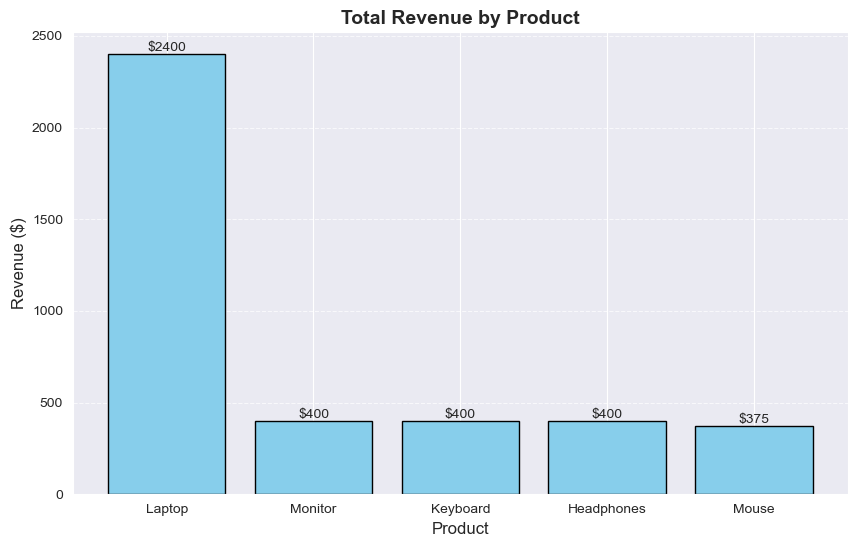

In [10]:
# 1. Create a Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df['product'], df['revenue'], color='skyblue', edgecolor='black')

# 2. Add labels and title for polish
plt.title('Total Revenue by Product', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Add value labels on top of bars (The "Pro" touch)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${int(height)}',
             ha='center', va='bottom')

# 4. Save and Show
plt.savefig('sales_chart.png')
print("\n Chart saved as 'sales_chart.png'")
plt.show()

# 5. Clean up connection
conn.close()